In [1]:
import pickle
import datetime
from blockchain import blockexplorer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter, attrgetter, methodcaller
%matplotlib inline

In [2]:
dbFile = "simple_loop_process.dat"
timeFile = "new_data/times.txt"
timeDiffFile = "new_data/times_diff.txt"
actualTimeFile = "new_data/actual_times.txt"
blockchains = []
times = []
timeDiffs = []
actual_diffs = []
orphans = []
outliers = []

Reads data from the dbFile. This reads in blocks so we can manipulate them. The type of each block is simpleBlock from blockchain explorer.

In [3]:
def readData():
    with open(dbFile,"rb") as f:
        for _ in range(407908):
            try:
                blockchains.append(pickle.load(f))
            except:
                break

Writes the times to a file. Should only need to be done once, but whatever.

In [4]:
def writeTimes():
    with open(timeFile,"w") as f:
        for value in blockchains:
            f.write(str(value.time)+"\n")
            

Reads in the times from the timeFile.

In [5]:
def readTimes():
    global times
    times = [line.rstrip('\n') for line in open(timeFile)]

In [6]:
readData()
blockchains = blockchains[131:]

In [7]:
#check that we read in the blocks
len(blockchains)

401339

In [8]:
###SORT BY HEIGHT
#sorted(blockchains, key=lambda simple_block: student[2])
blockchains = sorted(blockchains, key=attrgetter('height'), reverse=True)
len(blockchains)

401339

In [9]:
def BlockInfo(index):
    print "Height: ",blockchains[index].height
    print "Time: ",blockchains[index].time
    print "Actual Time ",datetime.datetime.fromtimestamp(int(blockchains[index].time)).strftime('%Y-%m-%d %H:%M:%S')
    print "HASH: ",blockchains[index].hash
    print "Main Chain: ",blockchains[index].main_chain

In [10]:
BlockInfo(130)
print "############"
BlockInfo(131)
print "############"
BlockInfo(132)

Height:  407643
Time:  1460862365
Actual Time  2016-04-16 23:06:05
HASH:  0000000000000000041030af5a8b0439fe45057b1722afefb846a33ef83baf60
Main Chain:  True
############
Height:  407642
Time:  1460861880
Actual Time  2016-04-16 22:58:00
HASH:  00000000000000000501f88d2568af7f0ff4b5476aa35ed287691795c3b6af5b
Main Chain:  True
############
Height:  407641
Time:  1460861372
Actual Time  2016-04-16 22:49:32
HASH:  0000000000000000029e5d5f74fbda1d82de2867db02bba756d952ba7c4fbca8
Main Chain:  True


In [11]:
writeTimes()

In [12]:
readTimes()

In [13]:
#check that we read in the times
len(times)

401339

In [14]:
def write_actual_times():
    with open(actualTimeFile,"w") as f:
        for value in blockchains:
            f.write(str(value.height)+" "+datetime.datetime.fromtimestamp(int(value.time)).strftime('%Y-%m-%d %H:%M:%S')+"\n")

In [15]:
#times = times.sort()
write_actual_times()
#blockchains = blockchains2

This is a test block. Allows you to examine the timing and info about block. Ignore this as its lame

In [16]:
#print blockchains[0].time
#print blockchains[0].hash
#print blockchains[0].height
#print "########"
#print blockchains[1].time
#print blockchains[1].hash
#print blockchains[1].height
#print "########"
#print int(blockchains[0].time) - int(blockchains[1].time)
a = datetime.datetime.fromtimestamp(1460972535)
b = datetime.datetime.fromtimestamp(1460972545)
print type(a)
print b
#Mon, 18 Apr 2016 09:42:15 GMT
#Mon, 18 Apr 2016 09:42:25 GMT
#print type(blockchains[0].main_chain )
c =  a - b
print c.total_seconds()
print divmod(c.days * 86400 + c.seconds, 60)

<type 'datetime.datetime'>
2016-04-18 05:42:25
-10.0
(-1, 50)


Function that iterates over the times list and computes the difference between two times next to each other. Writes out to time_diff.txt. Reports the block height, time, and whether in main chain for each block as well as the time between each block. The last digit is seconds between blocks. Sample:
```
407864(1460995794,True) - 407863(1460992454,True)==> 0:55:40 ==>3340.0
```

In [17]:
def processTimes():
    global times
    global timeDiffs
    timeDiffs = []
    counter = 0
    f = open(timeDiffFile,"w")
    for i in range(len(times)):
        if i == len(times)-1:
            break
        #value = int(times[i]) - int(times[i+1])
        value = datetime.datetime.fromtimestamp(int(blockchains[i].time)) - datetime.datetime.fromtimestamp(int(blockchains[i+1].time))
        
        timeDiffs.append(value.total_seconds())
        f.write(str(counter)+": "+str(blockchains[i].height)+"("+str(blockchains[i].time)+","+str(blockchains[i].main_chain)+","+datetime.datetime.fromtimestamp(int(blockchains[i].time)).strftime('%Y-%m-%d %H:%M:%S')+")"+" - "+str(blockchains[i+1].height)+"("+str(blockchains[i+1].time)+","+str(blockchains[i+1].main_chain)+","+datetime.datetime.fromtimestamp(int(blockchains[i+1].time)).strftime('%Y-%m-%d %H:%M:%S')+")"+"==> "+str(value)+" ==>"+str(value.total_seconds())+" secs ==> "+str(value.total_seconds()/60)+" mins\n")
        counter += 1
    f.close()

In [18]:
processTimes()

In [19]:
#test that we have the right data
len(timeDiffs)

401338

In [20]:
timeDiffs[0]

1429.0

Function that converts unix time to human readable times and writes them to a file. Ignore this

In [21]:
def convertTimes():
    global times
    global actual_diffs
    f = open(actualTimeFile,"w")
    for value in times:
        value = datetime.datetime.fromtimestamp(int(value)).strftime('%Y-%m-%d %H:%M:%S')
        f.write(value+"\n")
    for value in timeDiffs:
        value2 = datetime.datetime.fromtimestamp(int(value)).strftime('%Y-%m-%d %H:%M:%S')
        actual_diffs.append(value2)
    f.close()

This converts the data that is negative to positive values

In [22]:
timeDiff_data = []
for value in timeDiffs:
    if value < 0:
        timeDiff_data.append(-1*value)
    else:
        timeDiff_data.append(value)

In [23]:
#import matplotlib.pyplot as plt
def plot_data(seq):
    #plt.plot([1,2,3,4])
    plt.plot(timeDiff_data, seq)
    plt.ylabel('Time between blocks')
    plt.xlabel('Sequence')
    plt.show()

In [34]:
seq = []
for i in range(1,len(timeDiffs)+1):
    seq.append(i)
    
blocks = []
for i in range(len(blockchains)):
    blocks.append(blockchains[i].height)

In [35]:
#plot_data(seq)
timeDiff_data[0]

1429.0

In [38]:
print len(timeDiff_data)
print len(seq)
print len(blocks)
del blocks[-1]

401338
401338
401339


In [39]:
def convertToMin(arr):
    temp = []
    for i in range(len(arr)):
        temp.append(arr[i]/60)
    return temp

In [40]:
del seq[-1]
del timeDiff_data[-1]

In [72]:
del timeDiff_data[-1]

In [64]:
#df = pd.DataFrame({'index':seq,'time':convertToMin(timeDiff_data)})
df = pd.DataFrame({'index':blocks[800:850],'time':convertToMin(timeDiff_data[800:850])})
#df = pd.DataFrame({'time':convertToMin(timeDiff_data[800:850])})

#df = pd.DataFrame({'index':seq[0:50],'time':timeDiff_data[0:50]})
#df = pd.DataFrame({'index':seq[0:50],'time':convertToMin(timeDiff_data[0:50])})
#df = pd.DataFrame({'index':seq[300:400],'time':convertToMin(timeDiff_data[300:400])})
#df = pd.DataFrame({'index':seq[300:400],'time':timeDiff_data[300:400]})
print df.describe()

               index       time
count      50.000000  50.000000
mean   406949.960000   8.075333
std        14.144964   7.659377
min    406926.000000   0.133333
25%    406938.250000   1.791667
50%    406949.500000   5.966667
75%    406961.750000  10.595833
max    406974.000000  34.066667


In [47]:
#my_plot = df.plot(kind='bar')
timeDiff_mins = convertToMin(timeDiff_data)
temp = convertToMin(timeDiff_data[0:50])
print temp[6]

16.2333333333


In [51]:
print df.tail()

     index       time
45  406930   0.650000
46  406929   3.683333
47  406928   0.283333
48  406927  17.266667
49  406926  10.633333


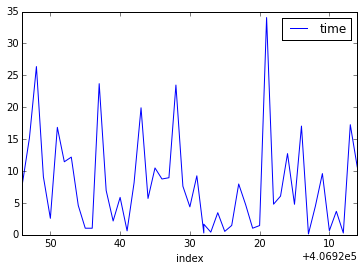

In [65]:
df.plot(kind='line',x='index',y='time')

[]

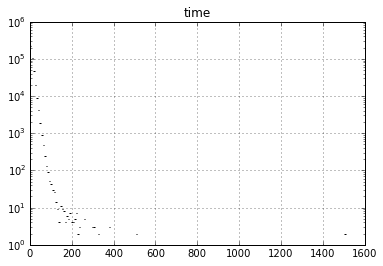

In [63]:
df2 = pd.DataFrame({'time':convertToMin(timeDiff_data)})
#df2.plot(kind='hist',bins=100)
df2.hist(bins=200)
plt.semilogy()

In [34]:
df2.describe()


,time
count,50.000000
mean,10.073333
std,8.060469
min,0.716667
25%,3.579167
50%,7.566667
75%,16.179167
max,29.216667


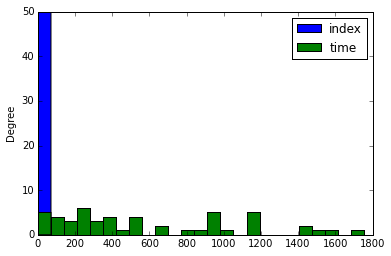

In [35]:
df.plot(kind='hist',bins=25)

In [36]:
def outlier(points,thresh=10):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [37]:
df3 = pd.DataFrame({'index':seq,'time':timeDiff_data})

x = outlier(df3['time'])
len(x)

401337

In [38]:
def remove_outliers(df):
    temp = []
    x = outlier(df)
    for i in range(len(df)):
        if x[i] == True:
            print "Removing ",df[i]
        else:
            temp.append(df[i])
    return temp

In [39]:
new  = remove_outliers(df3['time'])

Removing  4699.0
Removing  4537.0
Removing  5018.0
Removing  5426.0
Removing  4973.0
Removing  5097.0
Removing  5641.0
Removing  4564.0
Removing  4702.0
Removing  4797.0
Removing  4784.0
Removing  5048.0
Removing  4988.0
Removing  5280.0
Removing  4724.0
Removing  4800.0
Removing  4600.0
Removing  6524.0
Removing  4620.0
Removing  4823.0
Removing  5683.0
Removing  5268.0
Removing  6095.0
Removing  5488.0
Removing  5408.0
Removing  4767.0
Removing  4529.0
Removing  4917.0
Removing  5296.0
Removing  5449.0
Removing  4576.0
Removing  4530.0
Removing  4678.0
Removing  4968.0
Removing  5568.0
Removing  7335.0
Removing  5194.0
Removing  6140.0
Removing  4601.0
Removing  5522.0
Removing  5045.0
Removing  5803.0
Removing  6631.0
Removing  4779.0
Removing  5208.0
Removing  4527.0
Removing  5122.0
Removing  7741.0
Removing  5359.0
Removing  5434.0
Removing  5836.0
Removing  5610.0
Removing  5726.0
Removing  5441.0
Removing  6201.0
Removing  7124.0
Removing  4580.0
Removing  6002.0
Removing  4958

In [40]:
df4 = pd.DataFrame({'time':new})

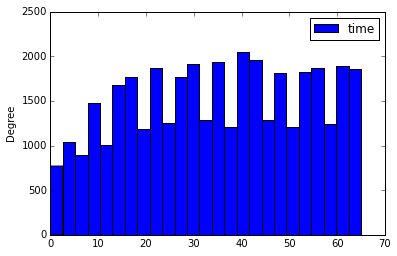

In [41]:
x = df4.plot(kind='hist',bins=25,range=[0, 65])

In [42]:
df4.describe()

,time
count,400814.000000
mean,578.019795
std,563.996581
min,0.000000
25%,174.000000
50%,408.000000
75%,801.000000
max,4511.000000


In [43]:
df4.head()

,time
0,1429
1,220
2,296
3,305
4,240


In [44]:
bins = np.linspace(min(df4['time']),max(df4['time']),25)

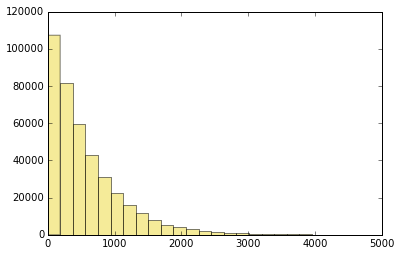

In [45]:
fig, ax = plt.subplots(1,1)
ax.hist(df4['time'],bins=bins,alpha=0.5,color='#EDD834')
#ax.set_xticks(bins[:-1])
plt.show()

In [46]:
def find_orphans():
    global orphans
    global blockchains
    orphans = []
    for i in blockchains:
        if i.main_chain == False:
            orphans.append(i)

In [47]:
len(orphans)

0

In [48]:
find_orphans()

In [49]:
len(orphans)

817

In [50]:
print orphans[0].time
print orphans[0].hash
print orphans[0].height

1460907019
00000000000000000307fce1866969b24cb465f98bf61519fbcc1f0dc05b0d80
407722


Segregates blocks into two lists, before and after the paper

In [82]:
def segregateBlocks():
    threshold = 1357016625
    before = []
    after = []
    for block in blockchains:
        if block.time < threshold:
            before.append(block)
        else:
            after.append(block)
    before = sorted(before, key=attrgetter('height'), reverse=True)
    after = sorted(after, key=attrgetter('height'), reverse=True)
    return before,after

In [87]:
def CalcTimes(chain,fname):
    timeDiffs = []
    counter = 0
    f = open(fname,"w")
    for i in range(len(chain)):
        if i == len(chain)-1:
            break
        #value = int(times[i]) - int(times[i+1])
        value = datetime.datetime.fromtimestamp(int(chain[i].time)) - datetime.datetime.fromtimestamp(int(chain[i+1].time))
        
        timeDiffs.append(value.total_seconds())
        f.write(str(counter)+": "+str(chain[i].height)+"("+str(chain[i].time)+","+str(chain[i].main_chain)+","+datetime.datetime.fromtimestamp(int(chain[i].time)).strftime('%Y-%m-%d %H:%M:%S')+")"+" - "+str(chain[i+1].height)+"("+str(chain[i+1].time)+","+str(chain[i+1].main_chain)+","+datetime.datetime.fromtimestamp(int(chain[i+1].time)).strftime('%Y-%m-%d %H:%M:%S')+")"+"==> "+str(value)+" ==>"+str(value.total_seconds())+" secs ==> "+str(value.total_seconds()/60)+" mins\n")
        counter += 1
    f.close()
    return timeDiffs

In [119]:
before,after = segregateBlocks()
print len(before)
print len(after)

208133
193206


In [120]:
before_diffs = CalcTimes(before,"new_data/before_diffs.txt")
after_diffs = CalcTimes(after,"new_data/after_diffs.txt")



In [121]:
print len(before_diffs)
print len(before)
del before[-1]
del after[-1]
print len(before)

208132
208133
208132


In [320]:
before_data = []
after_data = []
for value in before_diffs:
    if value < 0.0:
        before_data.append(-1*value)
    else:
        before_data.append(value)
for value in after_diffs:
    if value < 0.0:
        after_data.append(-1*value)
    else:
        after_data.append(value)

In [321]:
before_df = pd.DataFrame({'index':before,'time':convertToMin(before_data)})
after_df = pd.DataFrame({'index':after,'time':convertToMin(after_data)})
print before_df.describe()
print after_df.describe()

                time
count  208132.000000
mean       10.338053
std        21.770765
min         0.000000
25%         3.016667
50%         7.116667
75%        13.916667
max      7719.333333
                time
count  193205.000000
mean        9.262994
std         9.127835
min         0.000000
25%         2.783333
50%         6.500000
75%        12.816667
max       129.016667


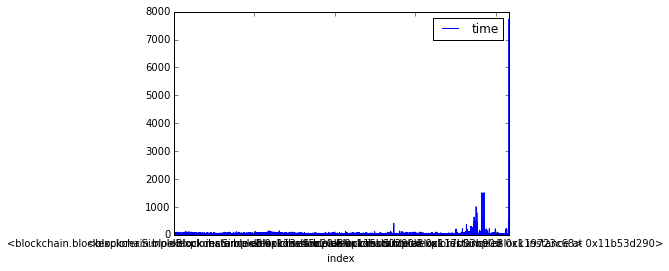

In [126]:
before_df.plot(kind='line',x='index',y='time')

[]

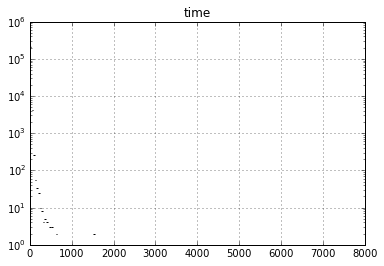

In [131]:
before_df2 = pd.DataFrame({'time':convertToMin(before_data)})
#df2.plot(kind='hist',bins=100)
before_df2.hist(bins=200)
plt.semilogy()

[]

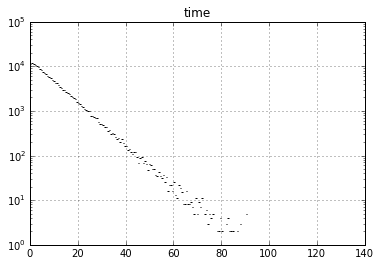

In [128]:
after_df2 = pd.DataFrame({'time':convertToMin(after_data)})
#df2.plot(kind='hist',bins=100)
after_df2.hist(bins=200)
plt.semilogy()

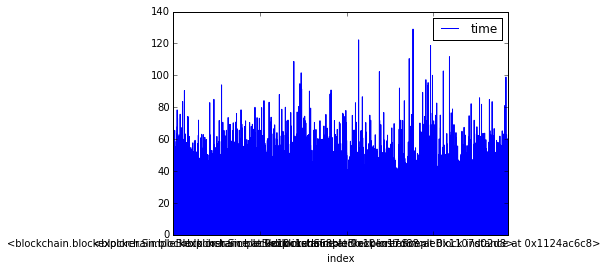

In [132]:
after_df.plot(kind='line',x='index',y='time')

In [208]:
#Takes in a chain and a threshold and returns the percent below that threshold(inclusive)
# chain ==> a timediff chain aka a python list of times in seconds
# threshold ==> a time in seconds so if you want 1 min you use 60
def calculate_thresh_percent(chain,threshold):
    #print len(chain)
    percent = 0
    temp_val = 0
    for i in chain:
        if 0<i <= threshold:
            temp_val += 1
    #print temp_val
    #print len(chain)
    percent = temp_val / float(len(chain))
    #print percent
    return percent,temp_val

In [209]:
if 4.0 <= 60:
    print True

True


In [210]:
print calculate_thresh_percent(before_data,60.0)
print calculate_thresh_percent(after_data,60)

(0.08305786712278747, 17287)
(0.09040656297714862, 17467)


In [211]:
#returns a datafram with thresholds
def calculate_thresholds(chain,max_thresh,inc=1):
    threshs = []
    values = []
    blocks = []
    index = 0
    while index <= max_thresh: 
        threshs.append(index)
        per,total = calculate_thresh_percent(chain,index*60)
        values.append(per*100.00)
        blocks.append(total)
        index +=inc
    return pd.DataFrame({'Thresholds':threshs,"Percentage":values,"NumBlocks":blocks})

In [251]:
thresh = 15
before_percent = calculate_thresholds(before_data,thresh)
after_percent = calculate_thresholds(after_data,thresh)
overall = calculate_thresholds(timeDiff_data,thresh)

In [252]:
len(before_data)

208132

In [262]:
after_percent

,NumBlocks,Percentage,Thresholds
0,0,0.000000,0
1,17467,9.040656,1
2,35437,18.341658,2
3,51670,26.743614,3
4,66193,34.260501,4
5,79455,41.124712,5
6,91304,47.257576,6
7,101853,52.717580,7
8,111291,57.602547,8
9,119931,62.074480,9


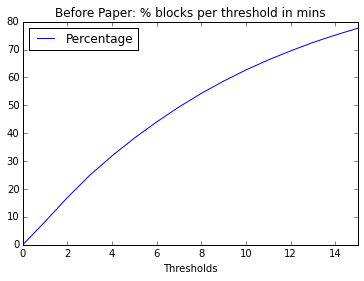

In [260]:
before_percent.plot(kind='line',x='Thresholds',y='Percentage', title ='Before Paper: % blocks per threshold in mins')
#before_percent.plot(kind='line',x='Thresholds',y='NumBlocks')

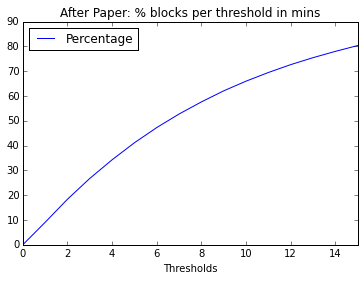

In [259]:
after_percent.plot(kind='line',x='Thresholds',y='Percentage', title ='After Paper: % blocks per threshold in mins')

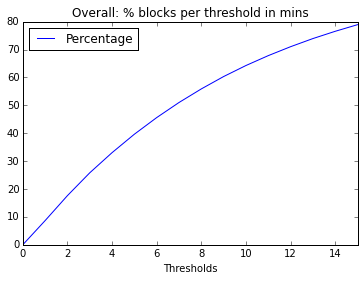

In [261]:
overall.plot(kind='line',x='Thresholds',y='Percentage', title ='Overall: % blocks per threshold in mins')

In [338]:
def calculate_consec(chain):
    marker = int(chain[0])
    tup = [marker,1,[chain[0]]]
    threshold = 1
    overall = []
    for i in range(1,len(chain)):
        if marker-threshold <= int(chain[i]) <= marker+threshold:
            tup[1] += 1
            tup[2].append(chain[i])
        else:
            if tup[1] > 1:
                overall.append(tup)
            marker = int(chain[i])
            tup = [marker,1,[chain[i]]]
    return overall

In [355]:
consecutives = calculate_consec(convertToMin(before_data))
len(consecutives)
print consecutives[0]

[1, 2, [1.0166666666666666, 1.1]]


In [356]:
consecutives_after = calculate_consec(convertToMin(after_data))
len(consecutives_after)
print consecutives_after[0]

[3, 2, [3.6666666666666665, 4.933333333333334]]


In [340]:
print consecutives[4]
print before_data[1]

[6, 2, [6.1, 5.283333333333333]]
571.0


In [353]:
#BEFORE
one_num_blocks = []
two_num_blocks = []
for i in consecutives:
    if i[0] == 1:
        one_num_blocks.append(i[1])
    if i[0] == 2:
        two_num_blocks.append(i[1])
for i in consecutives:
    if i[1] > 2 and i[0] == 1:
        print i
        

[1, 3, [1.1833333333333333, 2.3666666666666667, 2.7]]
[1, 4, [1.3666666666666667, 1.7333333333333334, 1.7166666666666666, 2.1333333333333333]]
[1, 3, [1.85, 0.9333333333333333, 2.25]]
[1, 3, [1.55, 2.533333333333333, 2.35]]
[1, 3, [1.1666666666666667, 2.7666666666666666, 1.15]]
[1, 3, [1.25, 2.0833333333333335, 2.4]]
[1, 3, [1.8666666666666667, 1.1166666666666667, 2.533333333333333]]
[1, 3, [1.5666666666666667, 1.3333333333333333, 1.85]]
[1, 3, [1.5, 0.95, 2.316666666666667]]
[1, 5, [1.3166666666666667, 1.8, 2.45, 2.816666666666667, 1.5333333333333334]]
[1, 4, [1.4833333333333334, 2.1333333333333333, 1.1, 2.033333333333333]]
[1, 3, [1.1833333333333333, 0.9166666666666666, 0.5333333333333333]]
[1, 3, [1.8333333333333333, 1.5666666666666667, 0.35]]
[1, 3, [1.0166666666666666, 1.05, 1.15]]
[1, 3, [1.9666666666666666, 2.2333333333333334, 2.933333333333333]]
[1, 3, [1.1666666666666667, 1.8666666666666667, 0.3]]
[1, 3, [1.2333333333333334, 2.85, 0.5666666666666667]]
[1, 3, [1.116666666666666

In [357]:
#AFTER
one_num_blocks_after = []
two_num_blocks_after = []
for i in consecutives_after:
    if i[0] == 1:
        one_num_blocks_after.append(i[1])
    if i[0] == 2:
        two_num_blocks_after.append(i[1])
for i in consecutives:
    if i[1] > 2 and i[0] == 1:
        print i

[1, 3, [1.1833333333333333, 2.3666666666666667, 2.7]]
[1, 4, [1.3666666666666667, 1.7333333333333334, 1.7166666666666666, 2.1333333333333333]]
[1, 3, [1.85, 0.9333333333333333, 2.25]]
[1, 3, [1.55, 2.533333333333333, 2.35]]
[1, 3, [1.1666666666666667, 2.7666666666666666, 1.15]]
[1, 3, [1.25, 2.0833333333333335, 2.4]]
[1, 3, [1.8666666666666667, 1.1166666666666667, 2.533333333333333]]
[1, 3, [1.5666666666666667, 1.3333333333333333, 1.85]]
[1, 3, [1.5, 0.95, 2.316666666666667]]
[1, 5, [1.3166666666666667, 1.8, 2.45, 2.816666666666667, 1.5333333333333334]]
[1, 4, [1.4833333333333334, 2.1333333333333333, 1.1, 2.033333333333333]]
[1, 3, [1.1833333333333333, 0.9166666666666666, 0.5333333333333333]]
[1, 3, [1.8333333333333333, 1.5666666666666667, 0.35]]
[1, 3, [1.0166666666666666, 1.05, 1.15]]
[1, 3, [1.9666666666666666, 2.2333333333333334, 2.933333333333333]]
[1, 3, [1.1666666666666667, 1.8666666666666667, 0.3]]
[1, 3, [1.2333333333333334, 2.85, 0.5666666666666667]]
[1, 3, [1.116666666666666

In [358]:
one_df = pd.DataFrame({"NumBlocks":one_num_blocks})
two_df = pd.DataFrame({"NumBlocks":two_num_blocks})
one_after_df = pd.DataFrame({"NumBlocks":one_num_blocks_after})
two_after_df = pd.DataFrame({"NumBlocks":two_num_blocks_after})

In [365]:
one_df.head()

,NumBlocks
0,2
1,3
2,2
3,4
4,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12e4435d0>]], dtype=object)

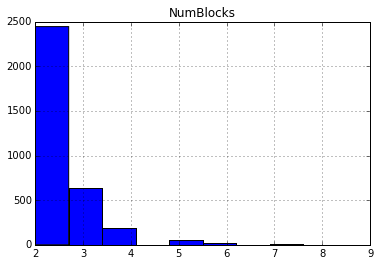

In [348]:
#before
one_df.hist(bins=10)
#plt.semilogy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125618350>]], dtype=object)

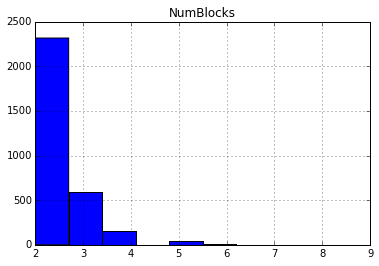

In [361]:
#before
two_df.hist(bins=10)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128c6eb90>]], dtype=object)

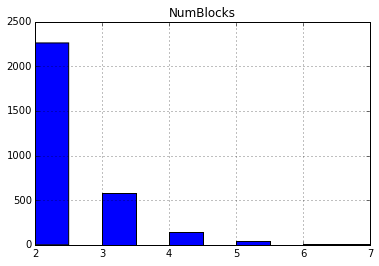

In [362]:
#after
two_after_df.hist(bins=10)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12569e410>]], dtype=object)

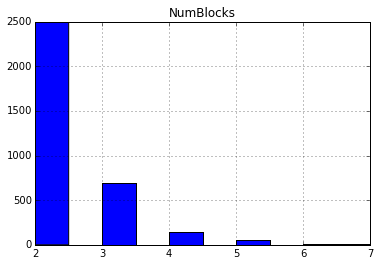

In [363]:
#after
one_after_df.hist(bins=10)


6